In [ ]:
# !pip install git+https://github.com/mementum/backtrader.git@0fa63ef4a35dc53cc7320813f8b15480c8f85517#egg=backtrader
!pip install backtrader
!pip install yfinance
!pip install mplfinance
!pip install matplotlib==3.2.2

In [3]:
import math
import backtrader as bt
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

In [4]:
from components.BuyAndHold import BuyAndHold
from components.DCA import DollarCostAverage
from components.VA import ValueInvesting
from components.utils import ComissionInfo

In [5]:
def get_yf_data(ticker="BTC-USD", interval="1d", period="max"): 
    ticker_yf = yf.Ticker(ticker)
    hist = ticker_yf.history(period=period, interval=interval)
    return bt.feeds.PandasData(dataname = hist)

data = get_yf_data()

In [19]:
def test_strategy(data, strategy=None, initial_cash=1000):
    cerebro = bt.Cerebro()
    cerebro.adddata(data)
    cerebro.addstrategy(strategy)

    broker_args = dict(coc=True)
    cerebro.broker = bt.brokers.BackBroker(**broker_args)
    ankwargs = dict(timeframe=bt.TimeFrame.Years)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, fund=True, **ankwargs)
    cerebro.addanalyzer(CashMarket)
    cerebro.broker.addcommissioninfo(ComissionInfo())

    cerebro.broker.set_cash(initial_cash)
    results = cerebro.run()
    cerebro.plot(iplot=True, style='candlestick')
    return results



In [76]:
class CashMarket(bt.analyzers.Analyzer):
    """
    Analyzer returning cash and market values
    """
    def create_analysis(self):
        self.rets = {}
        self.vals = 0.0

    def notify_cashvalue(self, cash, value):
        self.vals = (cash, value)
        total = cash + value
        self.rets[self.strategy.datetime.datetime()] = total

    def get_analysis(self):
        return self.rets

--------------------------------------------------
Buy and HODL
Buy Orders:		1
Sell Orders:		0
Total Shares:		2.00
Total Value:		$69,405.48
Total Shares Value:		$69,405.48
Total Cash Value:		$85.33
Cost:		$914.67
Gross Return:		$68,490.81
Gross %:		7487.99%
ROI:		6840.55%
Fund Value:		5940.55%
Commission Cost:		$0.01
--------------------------------------------------


<IPython.core.display.Javascript object>


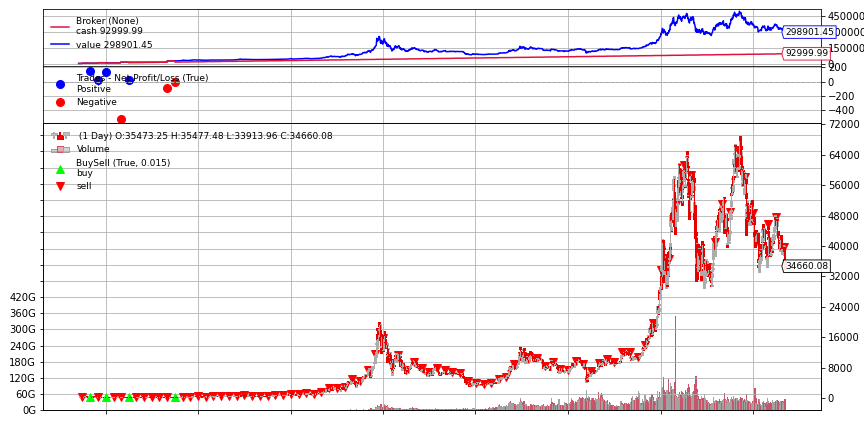

In [21]:
strategy = BuyAndHold
results = test_strategy(data, strategy=strategy)


In [30]:
strategy = DollarCostAverage
results = test_strategy(data, strategy=strategy)

--------------------------------------------------
Buy and HODL
Buy Orders:		93
Sell Orders:		0
Total Shares:		91.13
Total Value:		$3,159,695.73
Total Shares Value:		$3,159,695.73
Total Cash Value:		$999.99
Cost:		$93,000.01
Gross Return:		$3,066,695.73
Gross %:		3297.52%
ROI:		315869.57%
Fund Value:		7784.76%
Commission Cost:		$0.70
--------------------------------------------------


In [31]:
strategy = ValueInvesting
results = test_strategy(data, strategy=strategy)

Starting with 1000
Equity Currently = 1000.0, should have 1000
Equity Currently = 1000.0, should have 2000
Buying...
Current Cash 1000.0, Need to TopUp By 2000.0
Equity Currently = 3150.836441940587, should have 3000
Selling...
Equity Currently = 3175.5999982544545, should have 4000
Buying...
Current Cash 2999.9925000562507, Need to TopUp By 3824.3925018017962
Equity Currently = 7141.272835079597, should have 5000
Selling...
Equity Currently = 6546.551723104008, should have 6000
Selling...
Equity Currently = 6626.562513367996, should have 7000
Buying...
Current Cash 5999.992499841128, Need to TopUp By 6373.429986473132
Equity Currently = 13018.54190574268, should have 8000
Selling...
Equity Currently = 12710.149877156085, should have 9000
Selling...
Equity Currently = 12563.817193874005, should have 10000
Selling...
Equity Currently = 12974.329218763272, should have 11000
Selling...
Equity Currently = 13149.752587632362, should have 12000
Selling...
Equity Currently = 12931.39082697531

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
results[0].analyzers[3]

In [142]:
df = pd.DataFrame()
results_dfs = []
for strategy in [DollarCostAverage, ValueInvesting]:
    name = "Value_Investing" if strategy == ValueInvesting else "DCA"
    results = test_strategy(data, strategy=strategy)[0]
    value_analyser = results.analyzers[3].get_analysis()
    results_df = pd.DataFrame.from_dict(value_analyser, orient='index', columns=[name])
    results_dfs.append(results_df)

df = pd.concat(results_dfs, axis=1)      
    

--------------------------------------------------
Buy and HODL
Buy Orders:		93
Sell Orders:		0
Total Shares:		91.13
Total Value:		$3,159,695.73
Total Shares Value:		$3,159,695.73
Total Cash Value:		$999.99
Cost:		$93,000.01
Gross Return:		$3,066,695.73
Gross %:		3297.52%
ROI:		315869.57%
Fund Value:		7784.76%
Commission Cost:		$0.70
--------------------------------------------------
Starting with 1000
Equity Currently = 1000.0, should have 1000
Equity Currently = 1000.0, should have 2000
Buying...
Current Cash 1000.0, Need to TopUp By 2000.0
Equity Currently = 3150.836441940587, should have 3000
Selling...
Equity Currently = 3175.5999982544545, should have 4000
Buying...
Current Cash 2999.9925000562507, Need to TopUp By 3824.3925018017962
Equity Currently = 7141.272835079597, should have 5000
Selling...
Equity Currently = 6546.551723104008, should have 6000
Selling...
Equity Currently = 6626.562513367996, should have 7000
Buying...
Current Cash 5999.992499841128, Need to TopUp By 6373

In [146]:
df.head(50)

,DCA,Value_Investing
2014-09-17,3000.000000,2000.000000
2014-09-18,2928.059424,2000.000000
2014-09-19,2863.240251,2000.000000
2014-09-20,2894.088606,2000.000000
2014-09-21,2872.041312,2000.000000
2014-09-22,2879.324815,2000.000000
2014-09-23,2952.879320,2000.000000
2014-09-24,2925.358956,2000.000000
2014-09-25,2899.926819,2000.000000
2014-09-26,2884.294880,2000.000000


In [148]:
df.plot_bokeh()

Figure(id='2486', ...)

In [125]:
import numpy as np

In [126]:
df = pd.DataFrame({"Google": np.random.randn(1000)+0.2, 
                   "Apple": np.random.randn(1000)+0.17}, 
                   index=pd.date_range('1/1/2000', periods=1000))

In [127]:
df

,Google,Apple
2000-01-01,-1.569654,0.395554
2000-01-02,1.892307,1.091988
2000-01-03,-1.157523,2.684699
2000-01-04,-0.641849,-0.225874
2000-01-05,-0.703813,0.419492
...,...,...
2002-09-22,0.936517,-0.091710
2002-09-23,1.105142,0.097029
2002-09-24,1.243512,-0.620721
2002-09-25,-0.810895,-0.051231
